# readme
descrip: plot temperature and salt time-depth contours in the North East Atlantic subpolar gyre from FOSI HR and LR. <br>

update history: <br>
v1.0 DL 2021Feb05 <br>
v1.1 DL 2021Feb26 <br>

extra notes: <br>
hypothesis: 
Stronger AMOC -> stronger cyclonic Northern Recirculation Gyre --> a southward shift of the Gulf Stream path, and weaking of subpolar gyre -> upper level divergence of oceanic advected mass and heat flux, thus cooling in the subsurface and decreasing in the SSH in the Gulf Stream extension  The weakening of the subpolar gyre leads to a convergence of oceanic advected mass and heat flux, thus warming in the subsurface and further increasing in the SSH in the subpolar gyre. 


# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import cartopy
import cartopy.crs as ccrs
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# python GCM(POP) packages
# import xgcm
import pop_tools
import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.72.20.4:42859")
client

<Client: 'tcp://10.72.20.4:42859' processes=6 threads=12, memory=48.00 GB>

# define parameters

In [3]:
date_str='2021Mar07'


# --- time ---
yrs = np.arange(1951,2031) 
yrs1 = np.arange(1951,1961) 
yrs2 = np.arange(2041,2051) 
mons = np.arange(1,13)
time1=pd.date_range(start='1951-01-01', end='1960-12-01',freq="MS").shift(14, "D") # convert FOSI time to real time 
time2=pd.date_range(start='2041-01-01', end='2050-12-01',freq="MS").shift(14, "D") # convert FOSI time to real time 
# -----------


# --- lon and lat limits for North Atlantic (NA) and North-East Atlantic (NEA) for HR and LR ---
# lon1_NA, lon2_NA = -100, 0
# lat1_NA, lat2_NA = 10, 75

# lon1_NEA, lon2_NEA = 330, 340 
# lat1_NEA, lat2_NEA = 45, 55
# -----------------------------------------------------------------------------------------------

# --- obs ---
# indir_obs = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelChange_2020Dec15/DataAnalysis/'
#   'raw_data/SLAdownloadCMEMS_2020Dec19/dataset-duacs-rep-global-merged-allsat-phy-l4-monthly/') #resolution: 0.25x0.25 

# infiles_obs = [indir_obs + str(iyr)+ '/dt_global_allsat_msla_h_y' + str(iyr) + '_m' + str(imon).zfill(2) + '.nc' 
#               for iyr, imon in product(yrs, mons)]
# ------------


indir = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelChange_2020Dec15/DataAnalysis/'
         'data_after_manipulation/test/')

# --- HR ---
prefix = 'B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.'
chunk_size_HR = {'nlat':600,'nlon':600}

infile0_HR =  ('/ihesp/archive/g.e20.G.TL319_t13.control.001_contd/ocn/hist/monthly/'
               'g.e20.G.TL319_t13.control.001_contd.pop.h.0158-01.nc') # year 1993 --> 158,

infile_ssh_HR = indir + 'B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.SSH_1950_2050YearAv_2021Mar04.nc'
infiles1_h_st_HR = [indir + prefix + '_StericHeightNorthAtlantic_' + str(iyr) + '_2021Mar06.nc' 
              for iyr in yrs1]
infiles2_h_st_HR = [indir + prefix + '_StericHeightNorthAtlantic_' + str(iyr) + '_2021Mar06.nc' 
              for iyr in yrs2]
infiles_m_t_vel_HR = [indir + prefix + '_MassTendConvNorthAtlantic_' + str(iyr) + '_2021Mar08.nc' 
              for iyr in yrs]
# infile_temp_NA_HR = indir + 'TEMPYearAv_1993-2018_g.e20.G.TL319_t13.control.001_contd.pop.h.0_2021Feb04.nc'
# infile_salt_NA_HR = indir + 'SALTYearAv_1993-2018_g.e20.G.TL319_t13.control.001_contd.pop.h.0_2021Feb04.nc'
# infile_uvel_NA_HR = indir + 'UVELYearAv_1993-2018_g.e20.G.TL319_t13.control.001_contd.pop.h.0_2021Feb04.nc'
# infile_vvel_NA_HR = indir + 'VVELYearAv_1993-2018_g.e20.G.TL319_t13.control.001_contd.pop.h.0_2021Feb04.nc'
# infile_ut_NA_HR = indir + 'UETYearAv_1993-2018_g.e20.G.TL319_t13.control.001_contd.pop.h.0_2021Feb04.nc'
# infile_vt_NA_HR = indir + 'VNTYearAv_1993-2018_g.e20.G.TL319_t13.control.001_contd.pop.h.0_2021Feb04.nc'
# infile_wt_NA_HR = indir + 'WTTYearAv_1993-2018_g.e20.G.TL319_t13.control.001_contd.pop.h.0_2021Feb04.nc'

# nlon1_NA_HR, nlon2_NA_HR = 200, 1200
# nlat1_NA_HR, nlat2_NA_HR = 1200, 2200
nlat_NA_slice = slice(1200, 2400)
nlon_NA_slice = slice(0, 1200)
# ----------

# # --- LR ---
# # prefix_LR = 'g210.GIAF_JRA.v14.gx1v7.02.pop.h.0'
# chunk_size_LR = {'nlat':384,'nlon':320}

# infile0_LR =  ('/ihesp/archive/g210.GIAF_JRA.v14.gx1v7.02/ocn/hist/g210.GIAF_JRA.v14.gx1v7.02.pop.h.0158-01.nc') 

# # sla: sea level anomaly data files
# infile_ssh_LR = indir + 'SSHYearAv_1993-2018_g210.GIAF_JRA.v14.gx1v7.02.pop.h.0_2021Feb04.nc'
# infile_temp_LR = indir + 'TEMPYearAv_1993-2018_g210.GIAF_JRA.v14.gx1v7.02.pop.h.0_2021Feb04.nc'
# infile_salt_LR = indir + 'SALTYearAv_1993-2018_g210.GIAF_JRA.v14.gx1v7.02.pop.h.0_2021Feb04.nc'
# infile_uvel_LR = indir + 'UVELYearAv_1993-2018_g210.GIAF_JRA.v14.gx1v7.02.pop.h.0_2021Feb04.nc'
# infile_vvel_LR = indir + 'VVELYearAv_1993-2018_g210.GIAF_JRA.v14.gx1v7.02.pop.h.0_2021Feb04.nc'
# infile_ut_LR = indir + 'UETYearAv_1993-2018_g210.GIAF_JRA.v14.gx1v7.02.pop.h.0_2021Feb04.nc'
# infile_vt_LR = indir + 'VNTYearAv_1993-2018_g210.GIAF_JRA.v14.gx1v7.02.pop.h.0_2021Feb04.nc'
# # ----------

# # --- outputs ---
# outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelChange_2020Dec15/DataAnalysis/pics/'
# pic1 = (outdir + 'TempSaltDepthTimeContoursNorthEastAtlanticFOSI_HR_LR_EntireWaterColumn_' + date_str + '.png')
# pic2 = (outdir + 'TempSaltDepthTimeContoursNorthEastAtlanticFOSI_HR_LR_Upper1000m_' + date_str + '.png')
# # ---------------

# load files and data analysia

In [4]:
ds_ssh = xr.open_dataset(infile_ssh_HR, chunks=chunk_size_HR)
ds_NA_ssh = ds_ssh.isel(nlon=nlon_NA_slice, nlat=nlat_NA_slice)
ds_NA_ssh
SSH_NA1 = ds_NA_ssh.SSH.sel(time=slice('1951','1960'))
SSH_NA2 = ds_NA_ssh.SSH.sel(time=slice('2041','2050'))
SSH_NA2

<xarray.DataArray 'SSH' (time: 10, nlat: 1200, nlon: 1200)>
dask.array<getitem, shape=(10, 1200, 1200), dtype=float32, chunksize=(10, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2041-12-31 00:00:00 ... 2050-12-31 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

In [5]:
ds_m_t_vel = xr.open_mfdataset(infiles_m_t_vel_HR, compat="override", combine="by_coords",data_vars="minimal",
                    coords="minimal", chunks={'nlat_t':600,'nlon_t':600}, parallel=True)
# ds_m_t_vel = ds_m_t_vel.assign_coords(time=time)
ds_m_t_vel

<xarray.Dataset>
Dimensions:        (nlat_t: 1200, nlon_t: 1200, time: 960)
Coordinates:
  * time           (time) object 1951-02-01 00:00:00 ... 2031-01-01 00:00:00
  * nlat_t         (nlat_t) float64 0.5 1.5 2.5 ... 1.198e+03 1.198e+03 1.2e+03
  * nlon_t         (nlon_t) float64 0.5 1.5 2.5 ... 1.198e+03 1.198e+03 1.2e+03
    TLONG          (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    TLAT           (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
Data variables:
    TEND_MASS_VEL  (time, nlat_t, nlon_t) float64 dask.array<chunksize=(12, 600, 600), meta=np.ndarray>

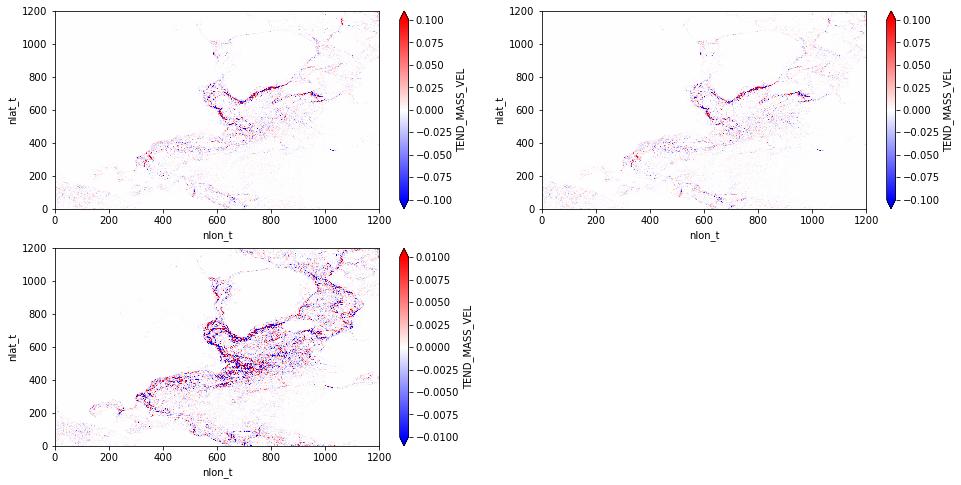

In [19]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(221)
ds_m_t_vel.TEND_MASS_VEL.sel(time=slice('1951','1970')).mean('time').plot(vmin=-0.1, vmax=0.1, cmap='bwr')
ax1 = plt.subplot(222)
ds_m_t_vel.TEND_MASS_VEL.sel(time=slice('2011','2030')).mean('time').plot(vmin=-0.1, vmax=0.1, cmap='bwr')
ax1 = plt.subplot(223)
(ds_m_t_vel.TEND_MASS_VEL.sel(time=slice('2011','2030')).mean('time') - ds_m_t_vel.TEND_MASS_VEL.sel(time=slice('1951','1970')).mean('time')
).plot(vmin=-0.01, vmax=0.01, cmap='bwr')

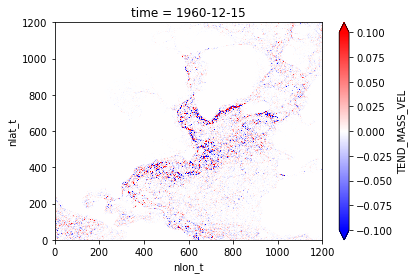

In [10]:
ds1_m_t_vel.TEND_MASS_VEL.isel(time=-1).plot(vmin=-0.1,vmax=0.1,cmap='bwr')

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
(ds1_m_t_vel.TEND_MASS_VEL.isel(nlon_t=600,nlat_t=400)).plot(ax=ax1,color='b',marker='o')
ax2 = plt.subplot(312)
((h_st1.isel(nlon=600,nlat=400)+5460)).plot(ax=ax2, color='r',marker='o')
ax3 = plt.subplot(313)
((h_st1.isel(nlon=600,nlat=400)+5460) + ds1_m_t_vel.TEND_MASS_VEL.isel(nlon_t=600,nlat_t=400)).plot(ax=ax3, color='k',marker='o')
# SSH_NA1.isel(nlon=600,nlat=400).plot(ax=ax3, color='g',marker='o')
plt.grid()

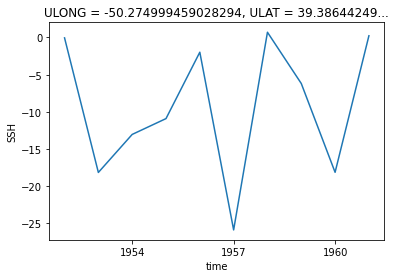

In [32]:
SSH_NA1.isel(nlon=600,nlat=400).plot()#.plot(ax=ax3, color='g',marker='o')

In [16]:
h_st1

NameError: name 'h_st1' is not defined

array(-0.0041385)

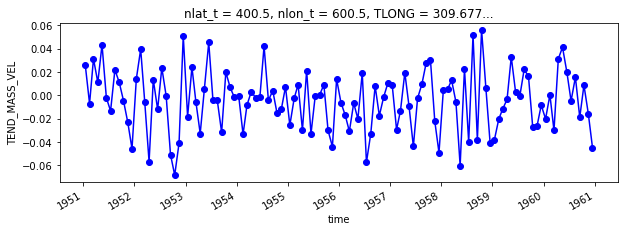

In [11]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(311)
(ds1_m_t_vel.TEND_MASS_VEL.isel(nlon_t=600,nlat_t=400)).plot(ax=ax1,color='b',marker='o')
ds1_m_t_vel.TEND_MASS_VEL.isel(nlon_t=600,nlat_t=400).mean('time').values

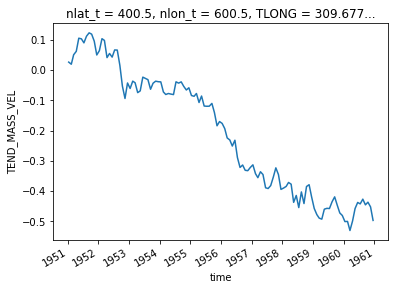

In [19]:
ds1_m_t_vel.TEND_MASS_VEL.isel(nlon_t=600,nlat_t=400).cumsum(dim='time').plot()

In [15]:
ds1_m_t_vel.TEND_MASS_VEL.isel(nlon_t=600,nlat_t=400).sel(time='1951').mean('time').values

array(0.00416643)

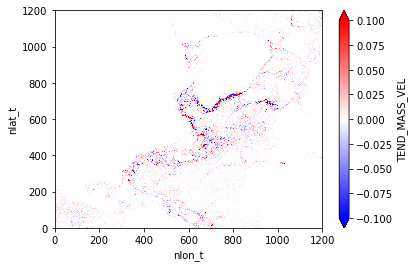

In [14]:
ds1_m_t_vel.TEND_MASS_VEL.mean('time').plot(vmin=-0.1,vmax=0.1,cmap='bwr')

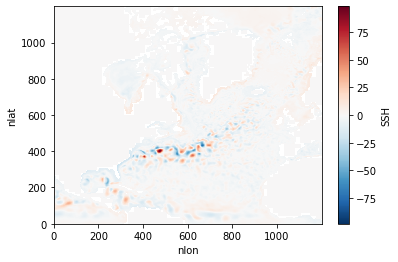

In [15]:
indir = '/ihesp/archive/HRMIP/B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013/ocn/hist/'
infile1 = indir + 'B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.1960-11-01.nc'
ds1 = xr.open_dataset(infile1,chunks={'nlat':600,'nlon':600})
infile2 = indir + 'B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.nday1.1960-12-01.nc'
ds2 = xr.open_dataset(infile2,chunks={'nlat':600,'nlon':600})
(ds2.isel(nlon=nlon_NA_slice, nlat=nlat_NA_slice).SSH.mean('time') - 
ds1.isel(nlon=nlon_NA_slice, nlat=nlat_NA_slice).SSH.mean('time')).plot()

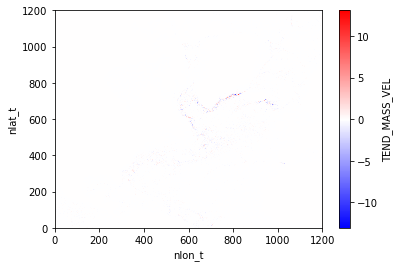

In [15]:
m_t_vel2 = ds1_m_t_vel.TEND_MASS_VEL.cumsum(dim='time').sel(time='1960').mean('time')/12
m_t_vel1 = ds1_m_t_vel.TEND_MASS_VEL.cumsum(dim='time').sel(time='1951').mean('time')/12
(m_t_vel2 - m_t_vel1).plot(cmap='bwr')

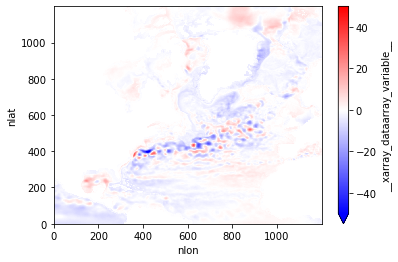

In [30]:
d_h_st = (h_st1.sel(time='1960').mean('time') - h_st1.sel(time='1951').mean('time'))*100
d_h_st.plot(vmin=-50,vmax=50,cmap='bwr')

<xarray.DataArray '__xarray_dataarray_variable__' (nlat: 1200, nlon: 1200)>
dask.array<add, shape=(1200, 1200), dtype=float64, chunksize=(600, 600), chunktype=numpy.ndarray>
Coordinates:
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

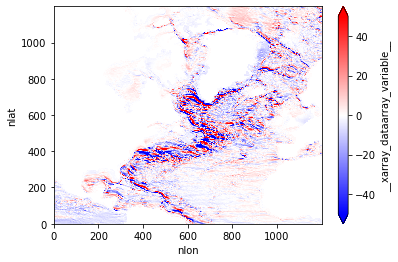

In [40]:
a = d_h_st.values + (m_t_vel2 - m_t_vel1).values
a = a + (d_h_st - d_h_st)
a.plot(vmin=-50,vmax=50,cmap='bwr')
a

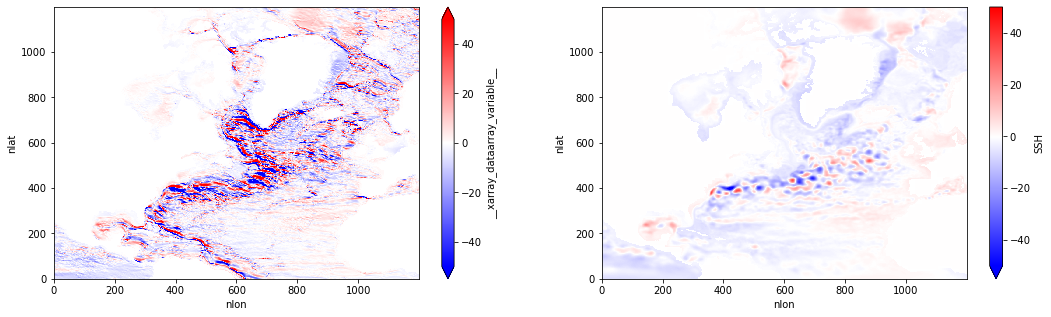

In [65]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
a.plot(ax=ax1,vmin=-50,vmax=50,cmap='bwr')
ax2 = fig.add_subplot(122)
(ds_NA_ssh.SSH.sel(time='1960').mean('time') - ds_NA_ssh.SSH.sel(time='1951').mean('time')).plot.pcolormesh(ax=ax2, vmin=-50,vmax=50,cmap='bwr')

<xarray.DataArray 'SSH' (nlat: 1200, nlon: 1200)>
dask.array<mean_agg-aggregate, shape=(1200, 1200), dtype=float32, chunksize=(600, 600), chunktype=numpy.ndarray>
Coordinates:
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

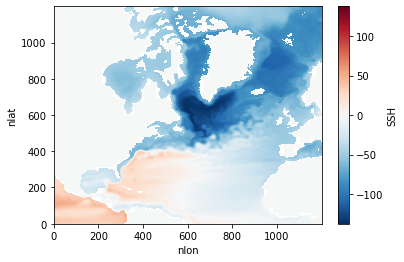

In [23]:
ssh1 = ds_NA_ssh.SSH.sel(time='1951').mean('time')
ssh1.plot()
ssh1

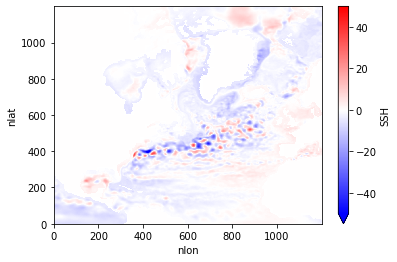

In [35]:
grid, ds1_h_st_x = pop_tools.to_xgcm_grid_dataset(ds1_h_st, periodic=False)

In [17]:
# ds1_h_st = xr.open_dataset(infiles1_h_st_HR, chunks=chunk_size_HR)
ds1_h_st = xr.open_mfdataset(infiles1_h_st_HR, compat="override", combine="by_coords",data_vars="minimal",
                    coords="minimal", chunks=chunk_size_HR, parallel=True)
ds1_h_st = ds1_h_st.assign_coords(time=time1)
ds1_h_st
h_st1 = -ds1_h_st.__xarray_dataarray_variable__
h_st1_yr = h_st1.resample(time="A").mean()*100
h_st1_yr

<xarray.DataArray '__xarray_dataarray_variable__' (time: 10, nlat: 1200, nlon: 1200)>
dask.array<mul, shape=(10, 1200, 1200), dtype=float64, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1951-12-31 1952-12-31 ... 1960-12-31
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

In [6]:
# ds1_h_st = xr.open_dataset(infiles1_h_st_HR, chunks=chunk_size_HR)
ds2_h_st = xr.open_mfdataset(infiles2_h_st_HR, compat="override", combine="by_coords",data_vars="minimal",
                    coords="minimal", chunks=chunk_size_HR, parallel=True)
ds2_h_st = ds2_h_st.assign_coords(time=time2)
ds2_h_st
h_st2 = -ds2_h_st.__xarray_dataarray_variable__
h_st2_yr = h_st2.resample(time="A").mean()*100
h_st2_yr

<xarray.DataArray '__xarray_dataarray_variable__' (time: 10, nlat: 1200, nlon: 1200)>
dask.array<mul, shape=(10, 1200, 1200), dtype=float64, chunksize=(1, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2041-12-31 2042-12-31 ... 2050-12-31
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(600, 600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


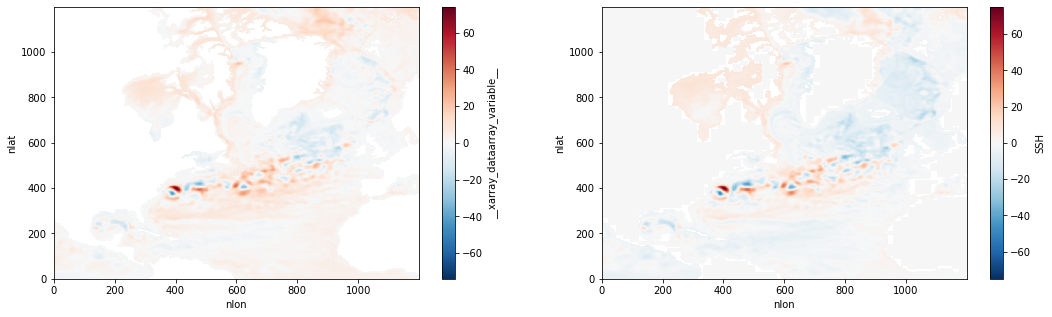

In [7]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
(h_st2_yr.isel(time=-1) - h_st2_yr.isel(time=0)).plot(ax=ax1)
ax2 = fig.add_subplot(122)
(SSH_NA2.isel(time=-1) - SSH_NA2.isel(time=0)).plot(ax=ax2)

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


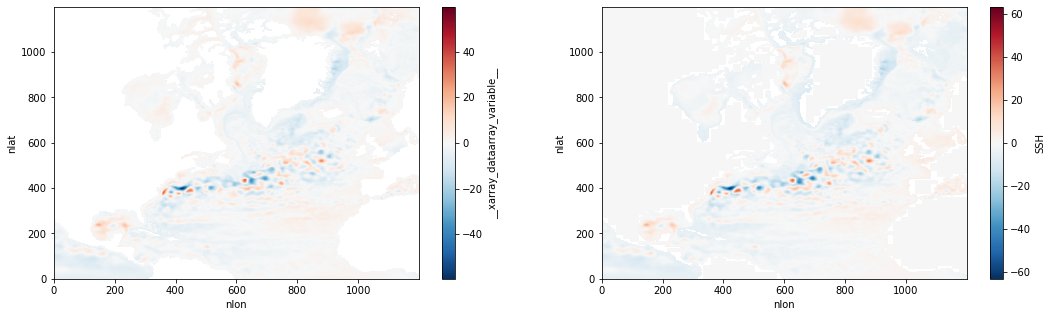

In [8]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
(h_st1_yr.isel(time=-1) - h_st1_yr.isel(time=0)).plot(ax=ax1)
ax2 = fig.add_subplot(122)
(SSH_NA1.isel(time=-1) - SSH_NA1.isel(time=0)).plot(ax=ax2)

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


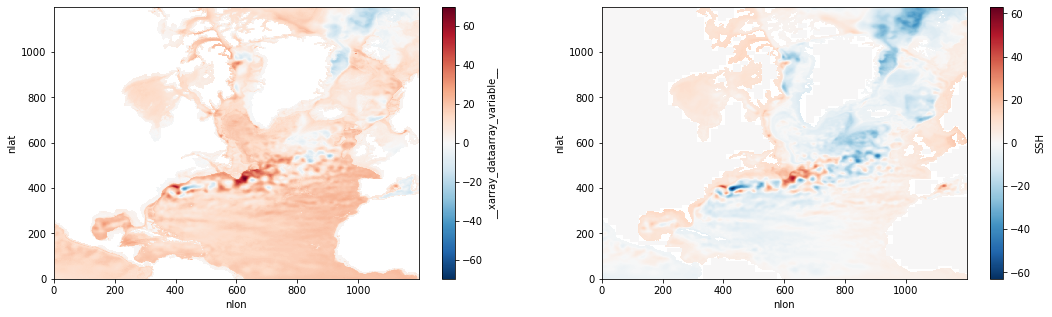

In [9]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
(h_st2_yr.isel(time=-1) - h_st1_yr.isel(time=0)).plot(ax=ax1)
ax2 = fig.add_subplot(122)
(SSH_NA2.isel(time=-1) - SSH_NA1.isel(time=0)).plot(ax=ax2)

In [13]:
h_st2_yr.mean().values

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(-249347.38216191)

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


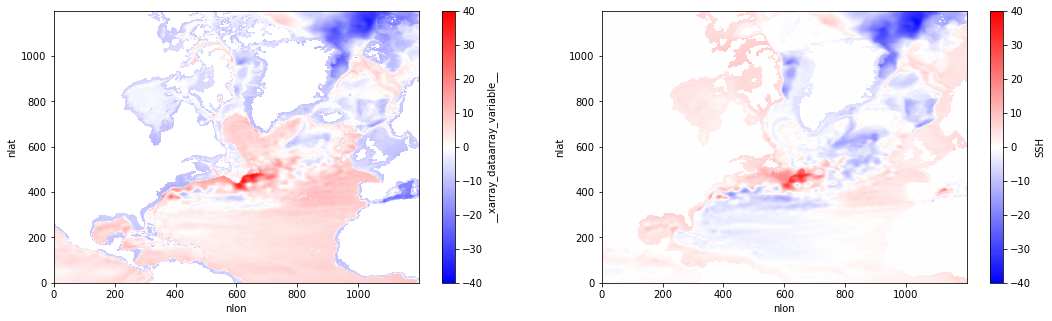

In [14]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
((h_st2_yr.mean('time') - h_st2_yr.mean()) - (h_st1_yr.mean('time') - h_st1_yr.mean())).plot(ax=ax1,vmin=-40,vmax=40,cmap='bwr')
ax2 = fig.add_subplot(122)
(SSH_NA2.mean('time') - SSH_NA1.mean('time')).plot(ax=ax2,vmin=-40,vmax=40,cmap='bwr')

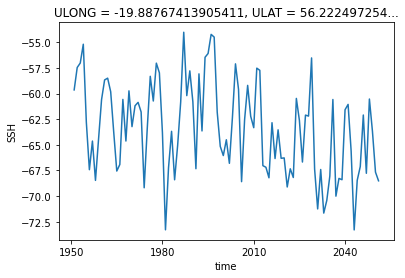

In [62]:
ds_NA_ssh.SSH.isel(nlon=900, nlat=600).plot() # subplar gyre
# ds_NA_ssh.SSH.isel(nlon=600, nlat=500).plot() # GS
# ds_NA_ssh.SSH.isel(nlon=600, nlat=700).plot() # Lab. Sea

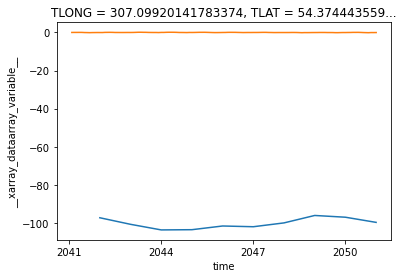

In [40]:
ds_NA_ssh.SSH.isel(nlon=600, nlat=600).sel(time=slice('2041','2051')).plot()
(ds2_h_st.__xarray_dataarray_variable__.isel(nlon=600, nlat=600) - ds2_h_st.__xarray_dataarray_variable__.isel(nlon=600, nlat=600, time=0)).plot()

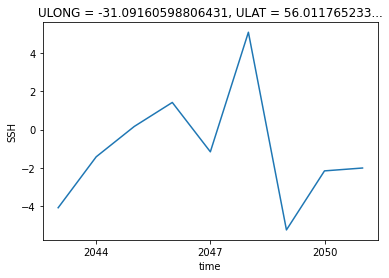

In [57]:
ds_NA_ssh.SSH.isel(nlon=800, nlat=600).sel(time=slice('2041','2051')).diff('time').plot()

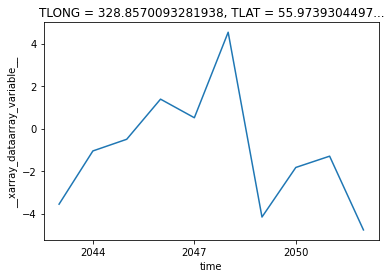

In [58]:
(-ds2_h_st.__xarray_dataarray_variable__.isel(nlon=800, nlat=600).resample(time="A").mean()*100).diff('time').plot()

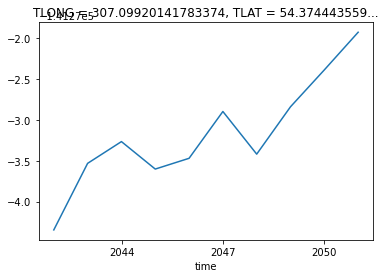

In [49]:
((-ds2_h_st.__xarray_dataarray_variable__.isel(nlon=600, nlat=600).resample(time="A").mean()*100) - ds_NA_ssh.SSH.isel(nlon=600, nlat=600).sel(time=slice('2041','2051'))).plot()

In [4]:
# infile_t13 = ('/scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/'
#              'POPgrids_tx0.1v3_2020Sep09.nc')
# ds_t13 = xr.open_dataset(infile_t13)
# ds_t13

In [5]:
# TLON_HR = ds_t13.TLONG.isel(nlon=slice(nlon1_NA_HR, nlon2_NA_HR), nlat=slice(nlat1_NA_HR, nlat2_NA_HR))
# TLAT_HR = ds_t13.TLAT.isel(nlon=slice(nlon1_NA_HR, nlon2_NA_HR), nlat=slice(nlat1_NA_HR, nlat2_NA_HR))
# TLON1_HR = TLON_HR
# TLON1_HR = TLON1_HR.where(TLON1_HR<180,TLON1_HR-360)
# TLON1_HR.plot()

In [6]:
ds_ssh_LR = xr.open_dataset(infile_ssh_LR)
ds_uvel_LR = xr.open_dataset(infile_uvel_LR)
ds_vvel_LR = xr.open_dataset(infile_vvel_LR)

ds_ssh_HR = xr.open_dataset(infile_ssh_HR)
ds_uvel_HR = xr.open_dataset(infile_uvel_NA_HR)
ds_vvel_HR = xr.open_dataset(infile_vvel_NA_HR)
ds_vvel_HR

<xarray.Dataset>
Dimensions:  (nlat: 1000, nlon: 1000, time: 26, z_t: 62)
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2018-12-31
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    VVEL     (time, z_t, nlat, nlon) float32 ...

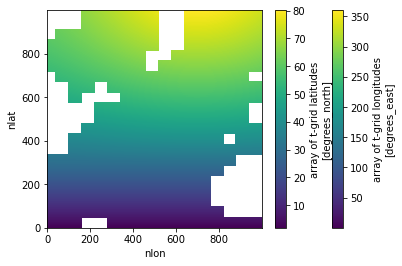

In [7]:
ds_uvel_HR.TLONG.plot()
ds_uvel_HR.TLAT.plot()

<xarray.DataArray 'VVEL' (nlat: 384, nlon: 320)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.        ,  0.        ,  0.        , ...,         nan,
                nan,  0.        ],
       [-0.08548349,  0.10050189,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    z_t      float32 4.827e+04
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
Dimensions without coordinates: nlat, nlon

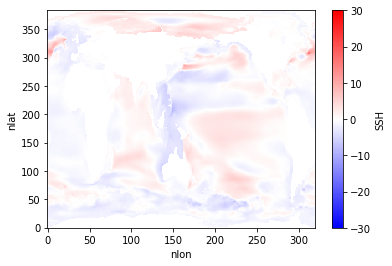

In [8]:
# ds_ssh_NA1_LR = ds_ssh_LR.isel(nlon=slice(0,50),nlat=slice(250,384))
# ds_ssh_NA2_LR = ds_ssh_LR.isel(nlon=slice(270,320),nlat=slice(250,384))
# ds_ssh_NA_LR = xr.concat([ds_ssh_NA2_LR,ds_ssh_NA1_LR],'nlon')
# ds_ssh_NA_LR

ssh2_LR = ds_ssh_LR.SSH.sel(time=time2_slice).mean('time')
ssh2_LR = ssh2_LR.where(abs(ssh2_LR)<10*100, np.nan)
ssh1_LR = ds_ssh_LR.SSH.sel(time=time1_slice).mean('time')
ssh1_LR = ssh1_LR.where(abs(ssh2_LR)<10*100, np.nan)
dssh_LR = ssh2_LR - ssh1_LR

u1_LR = ds_uvel_LR.UVEL.sel(z_t=500*100,method='nearest').sel(time=time1_slice).mean('time')
u1_LR = u1_LR.where(abs(u1_LR)<100*100, np.nan)
u2_LR = ds_uvel_LR.UVEL.sel(z_t=500*100,method='nearest').sel(time=time2_slice).mean('time')
u2_LR = u2_LR.where(abs(u1_LR)<100*100, np.nan)
du_LR = u2_LR - u1_LR

v1_LR = ds_vvel_LR.VVEL.sel(z_t=500*100,method='nearest').sel(time=time1_slice).mean('time')
v1_LR = v1_LR.where(abs(u1_LR)<100*100, np.nan)
v2_LR = ds_vvel_LR.VVEL.sel(z_t=500*100,method='nearest').sel(time=time2_slice).mean('time')
v2_LR = v2_LR.where(abs(u1_LR)<100*100, np.nan)
dv_LR = v2_LR - v1_LR


# fig, axes = plt.subplots(1,2,figsize=(15, 5))
# (ssh2_LR - ssh1_LR).plot.pcolormesh(vmin=-30,vmax=30, cmap='bwr', subplot_kws={'projection': ccrs.PlateCarree()})
(ssh2_LR - ssh1_LR).plot.pcolormesh(vmin=-30,vmax=30, cmap='bwr')

dv_LR

In [18]:
ssh2_HR = ds_ssh_HR.SSH.sel(time=time2_slice).mean('time')
ssh1_HR = ds_ssh_HR.SSH.sel(time=time1_slice).mean('time')
dssh_HR = ssh2_HR - ssh1_HR

u1_HR = ds_uvel_HR.UVEL.sel(z_t=500*100,method='nearest').sel(time=time1_slice).mean('time')
# u1_HR = u1_HR.where(abs(u1_HR)<100*100, np.nan)
u2_HR = ds_uvel_HR.UVEL.sel(z_t=500*100,method='nearest').sel(time=time2_slice).mean('time')
# u2_HR = u2_HR.where(abs(u1_HR)<100*100, np.nan)
du_HR = u2_HR - u1_HR

v1_HR = ds_vvel_HR.VVEL.sel(z_t=500*100,method='nearest').sel(time=time1_slice).mean('time')
# v1_LR = v1_LR.where(abs(u1_LR)<100*100, np.nan)
v2_HR = ds_vvel_HR.VVEL.sel(z_t=500*100,method='nearest').sel(time=time2_slice).mean('time')
# v2_LR = v2_LR.where(abs(u1_LR)<100*100, np.nan)
dv_HR = v2_HR - v1_HR
dv_HR 

<xarray.DataArray 'VVEL' (nlat: 1000, nlon: 1000)>
array([[-0.13622683, -0.1572116 , -0.17349935, ...,         nan,
                nan,         nan],
       [-0.13745262, -0.16330269, -0.17953211, ...,         nan,
                nan,         nan],
       [-0.13031876, -0.16074395, -0.17818558, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    z_t      float32 4.827e+04
    lon      (nlat, nlon) float64 -89.9 -89.8 -89.7 -89.6 ... 35.92 36.03 36.14
    lat      (nlat, nlon) float64 1.9 1.9 1.9 1.9 1.9 ... 74.3 74.26 74.23 74.2
    TLONG    (nlat, nlon) float64 270.1 270.1 270.2 270.4 ... 35.81 35.92 36.02
    TLAT     (nlat, nlon) float64 1.85 1.85 1.85 1.85 ... 74.29 74.26 74.23 74.2
Dimensions without coordinates: nlat, nlon

In [33]:
# ds_vvel_LR = ds_vvel_LR.rename({'ULONG': 'lon', 'ULAT': 'lat'}) # rn: rename
# ds_vvel_LR

# ds_vvel_HR = ds_vvel_HR.rename({'ULONG': 'lon', 'ULAT': 'lat'}) # rn: rename
# ds_vvel_HR

ds_NA_out = xr.Dataset({'lat': (['lat'], np.arange(lat1_NA, lat2_NA, 1.0)),
                     'lon': (['lon'], np.arange(lon1_NA, lon2_NA, 1.0))})
ds_NA_out

ds_NA_HR_out = xr.Dataset({'lat': (['lat'], np.arange(lat1_NA, lat2_NA, 0.1)),
                     'lon': (['lon'], np.arange(lon1_NA, lon2_NA, 0.1))})
ds_NA_HR_out

# weight_file_LR=('/scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/'
#              'bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
# weight_file_HR=('/scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/'
#              'bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
# regridder_LR = xe.Regridder(ds0_LR, ds_out, method='bilinear', periodic=True, filename=weight_file_LR, reuse_weights=True)

regridder_LR = xe.Regridder(ds_vvel_LR, ds_NA_out, method='bilinear')
regridder_HR = xe.Regridder(ds_vvel_HR, ds_NA_out, method='bilinear')
regridder_LR

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_384x320_65x100.nc 
Reuse pre-computed weights? False 
Input grid shape:           (384, 320) 
Output grid shape:          (65, 100) 
Periodic in longitude?      False

In [41]:
u1_rgd_LR = regridder_LR(u1_LR)
v1_rgd_LR = regridder_LR(v1_LR)
du_rgd_LR = regridder_LR(du_LR)
dv_rgd_LR = regridder_LR(dv_LR)
dssh_rgd_LR = regridder_LR(dssh_LR)

u1_rgd_HR = regridder_HR(u1_HR)
v1_rgd_HR = regridder_HR(v1_HR)
du_rgd_HR = regridder_HR(du_HR)
dv_rgd_HR = regridder_HR(dv_HR)
dssh_rgd_HR = regridder_HR(dssh_HR)

dv_rgd_HR 

<xarray.DataArray 'VVEL' (lat: 65, lon: 100)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.11995682,
         0.29342267, -0.12233065],
       [ 0.        ,  0.        ,  0.        , ...,  0.05560164,
         0.287091  ,  0.36441371],
       [ 0.        ,  0.        ,  0.        , ..., -0.23234695,
        -0.47031919, -0.40758408]])
Coordinates:
    z_t      float32 4.827e+04
  * lon      (lon) float64 -100.0 -99.0 -98.0 -97.0 ... -4.0 -3.0 -2.0 -1.0
  * lat      (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 70.0 71.0 72.0 73.0 74.0
Attributes:
    regrid_method:  bilinear

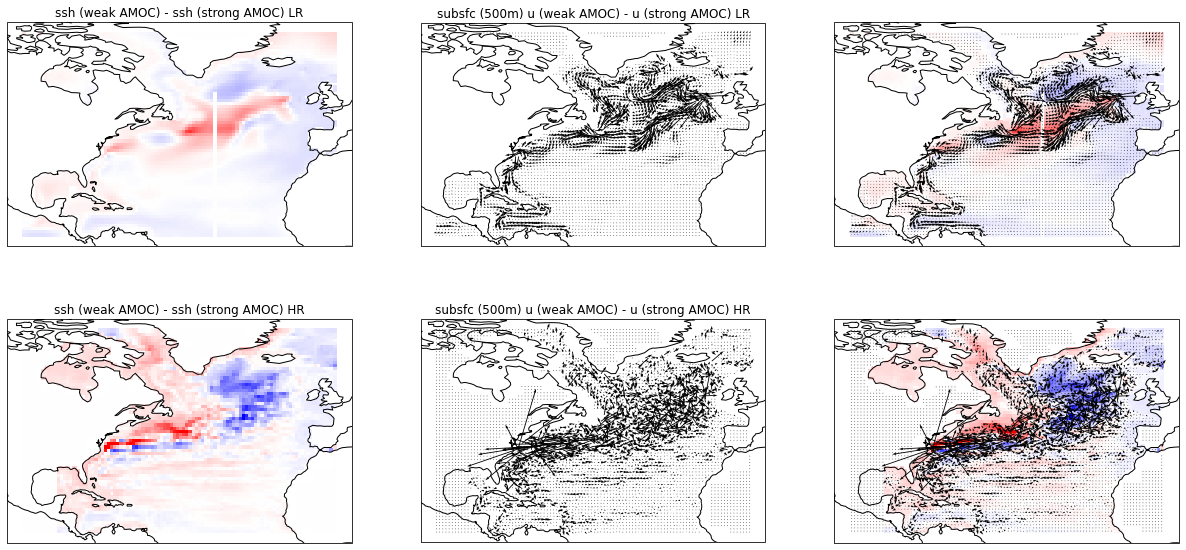

In [43]:
fig = plt.figure(figsize=(21, 10))
ax1 = fig.add_subplot(231,projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.pcolormesh(dssh_rgd_LR.lon, dssh_rgd_LR.lat, dssh_rgd_LR, vmin=-20, vmax=20, transform=ccrs.PlateCarree(), cmap='bwr')
ax1.set_title('ssh (weak AMOC) - ssh (strong AMOC) LR')

ax2 = fig.add_subplot(232,projection=ccrs.PlateCarree())
ax2.coastlines()
Q = ax2.quiver(du_rgd_LR.lon, du_rgd_LR.lat, du_rgd_LR, dv_rgd_LR, transform=ccrs.PlateCarree())
ax2.set_title('subsfc (500m) u (weak AMOC) - u (strong AMOC) LR')
# ax.set_xlim([-100,0])
# ax.set_ylim([0,75]) 

ax3 = fig.add_subplot(233,projection=ccrs.PlateCarree())
ax3.coastlines()
ax3.pcolormesh(dssh_rgd_LR.lon, dssh_rgd_LR.lat, dssh_rgd_LR, vmin=-20, vmax=20, transform=ccrs.PlateCarree(), cmap='bwr')
Q = ax3.quiver(du_rgd_LR.lon, du_rgd_LR.lat, du_rgd_LR, dv_rgd_LR, transform=ccrs.PlateCarree())

ax4 = fig.add_subplot(234,projection=ccrs.PlateCarree())
ax4.coastlines()
ax4.pcolormesh(dssh_rgd_HR.lon, dssh_rgd_HR.lat, dssh_rgd_HR, vmin=-20, vmax=20, transform=ccrs.PlateCarree(), cmap='bwr')
ax4.set_title('ssh (weak AMOC) - ssh (strong AMOC) HR')

ax5 = fig.add_subplot(235,projection=ccrs.PlateCarree())
ax5.coastlines()
Q = ax5.quiver(du_rgd_HR.lon, du_rgd_HR.lat, du_rgd_HR, dv_rgd_HR, transform=ccrs.PlateCarree())
ax5.set_title('subsfc (500m) u (weak AMOC) - u (strong AMOC) HR')
# ax.set_xlim([-100,0])
# ax.set_ylim([0,75]) 

ax6 = fig.add_subplot(236,projection=ccrs.PlateCarree())
ax6.coastlines()
ax6.pcolormesh(dssh_rgd_HR.lon, dssh_rgd_HR.lat, dssh_rgd_HR, vmin=-20, vmax=20, transform=ccrs.PlateCarree(), cmap='bwr')
Q = ax6.quiver(du_rgd_HR.lon, du_rgd_HR.lat, du_rgd_HR/100, dv_rgd_HR/100, transform=ccrs.PlateCarree())

# plt.show()

Text(0.5, 1.0, 'subsfc (500m) u (strong AMOC) HR')

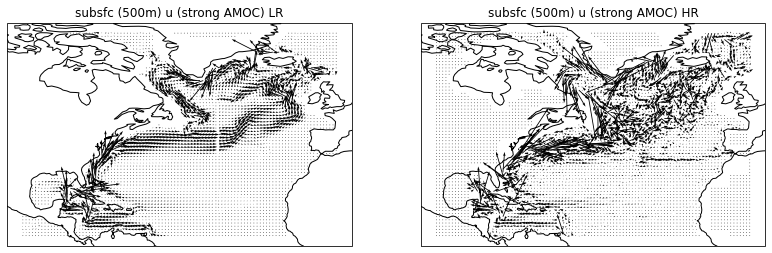

In [44]:
fig = plt.figure(figsize=(21, 10))
ax1 = fig.add_subplot(231,projection=ccrs.PlateCarree())
ax1.coastlines()
Q = ax1.quiver(u1_rgd_LR.lon, u1_rgd_LR.lat, u1_rgd_LR, v1_rgd_LR, transform=ccrs.PlateCarree())
ax1.set_title('subsfc (500m) u (strong AMOC) LR')

ax2 = fig.add_subplot(232,projection=ccrs.PlateCarree())
ax2.coastlines()
Q = ax2.quiver(u1_rgd_HR.lon, u1_rgd_HR.lat, u1_rgd_HR, v1_rgd_HR, transform=ccrs.PlateCarree())
ax2.set_title('subsfc (500m) u (strong AMOC) HR')
# ax.set_xlim([-100,0])
# ax.set_ylim([0,75]) 

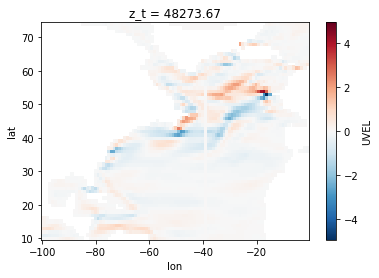

In [32]:
du_rgd_LR.plot()

In [14]:
u1_HR = ds_uvel_HR.UVEL.sel(z_t=500*100,method='nearest').sel(time=time1_slice).mean('time')
u2_HR = ds_uvel_HR.UVEL.sel(z_t=500*100,method='nearest').sel(time=time2_slice).mean('time')
du_HR = u2_HR - u1_HR

v1_HR = ds_vvel_HR.VVEL.sel(z_t=500*100,method='nearest').sel(time=time1_slice).mean('time')
v2_HR = ds_vvel_HR.VVEL.sel(z_t=500*100,method='nearest').sel(time=time2_slice).mean('time')
dv_HR = v2_HR - v1_HR
dv_HR

<xarray.DataArray 'VVEL' (nlat: 1000, nlon: 1000)>
array([[-0.13622683, -0.1572116 , -0.17349935, ...,         nan,
                nan,         nan],
       [-0.13745262, -0.16330269, -0.17953211, ...,         nan,
                nan,         nan],
       [-0.13031876, -0.16074395, -0.17818558, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    z_t      float32 4.827e+04
    ULONG    (nlat, nlon) float64 -89.9 -89.8 -89.7 -89.6 ... 35.92 36.03 36.14
    ULAT     (nlat, nlon) float64 1.9 1.9 1.9 1.9 1.9 ... 74.3 74.26 74.23 74.2
    TLONG    (nlat, nlon) float64 270.1 270.1 270.2 270.4 ... 35.81 35.92 36.02
    TLAT     (nlat, nlon) float64 1.85 1.85 1.85 1.85 ... 74.29 74.26 74.23 74.2
Dimensions without coordinates: nlat, nlon

In [15]:
ds_vvel_HR = ds_vvel_HR.rename({'ULONG': 'lon', 'ULAT': 'lat'}) # rn: rename
ds_vvel_HR

<xarray.Dataset>
Dimensions:  (nlat: 1000, nlon: 1000, time: 26, z_t: 62)
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2018-12-31
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    lon      (nlat, nlon) float64 ...
    lat      (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    VVEL     (time, z_t, nlat, nlon) float32 ...

In [11]:
ds_out = xe.util.grid_global(1, 1)
ds_out

<xarray.Dataset>
Dimensions:  (x: 360, x_b: 361, y: 180, y_b: 181)
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
    lon_b    (y_b, x_b) int64 -180 -179 -178 -177 -176 ... 176 177 178 179 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

In [42]:
infile0_LR =  ('/ihesp/archive/g210.GIAF_JRA.v14.gx1v7.02/ocn/hist/'
               'g210.GIAF_JRA.v14.gx1v7.02.pop.h.0158-01.nc') # use 1993(158)-01 as the reference file
ds0_LR=xr.open_dataset(infile0_LR)
ds0_LR = ds0_LR.rename({'ULONG': 'lon', 'ULAT': 'lat'}) # rn: rename
ds0_LR

ds_out = xe.util.grid_global(1, 1)
ds_out

# weight_file_LR=('/scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/'
#              'bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_LR = xe.Regridder(ds0_LR, ds_out, method='bilinear', periodic=True, filename=weight_file_LR, reuse_weights=True)
regridder_LR

Reuse existing file: /scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            /scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc 
Reuse pre-computed weights? True 
Input grid shape:           (384, 320) 
Output grid shape:          (180, 360) 
Output grid dimension name: ('y', 'x') 
Periodic in longitude?      True

In [29]:
# infile0_LR =  ('/ihesp/archive/g210.GIAF_JRA.v14.gx1v7.02/ocn/hist/'
#                'g210.GIAF_JRA.v14.gx1v7.02.pop.h.0158-01.nc') # use 1993(158)-01 as the reference file
# ds0_LR=xr.open_dataset(infile0_LR)
# ds_uvel_HR = ds_uvel_HR.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
# ds_uvel_HR

# ds_out = xe.util.grid_global(1, 1)
# ds_out

ds_out = xr.Dataset({'lat': (['lat'], np.arange(30, 65, 1.0)),
                     'lon': (['lon'], np.arange(-60, -30, 1.0)),
                    }
                   )

# weight_file_LR=('/scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/'
#              'bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
# weight_file_HR=('/scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/'
#              'bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
# regridder_LR = xe.Regridder(ds0_LR, ds_out, method='bilinear', periodic=True, filename=weight_file_LR, reuse_weights=True)
regridder_LR = xe.Regridder(ds_vvel_LR, ds_out, method='bilinear')

Create weight file: bilinear_1000x1000_35x30.nc


ImportError: Regrid(filename) requires PIO and does not work if ESMF has not been built with MPI support

In [ ]:

infile0_LR =  ('/ihesp/archive/g210.GIAF_JRA.v14.gx1v7.02/ocn/hist/'
               'g210.GIAF_JRA.v14.gx1v7.02.pop.h.0158-01.nc') # use 1993(158)-01 as the reference file
ds0_LR=xr.open_dataset(infile0_LR)
ds0_LR = ds0_LR.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
ds0_LR

ds_out = xe.util.grid_global(1, 1)
ds_out

weight_file_LR=('/scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/'
             'bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_LR = xe.Regridder(ds0_LR, ds_out, method='bilinear', periodic=True, filename=weight_file_LR, reuse_weights=True)
regridder_LR

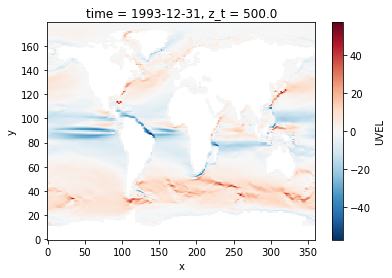

In [52]:
uvel_rgd_LR = uvel_rgd_LR.where(uvel_rgd_LR<100000)
vvel_rgd_LR = vvel_rgd_LR.where(uvel_rgd_LR<100000)
uvel_rgd_LR.plot()

In [69]:
(uvel_rgd_LR.lat,uvel_rgd_LR**2 + vvel_rgd_LR).plot()

AttributeError: 'tuple' object has no attribute 'plot'

In [32]:
uvel1_HR = ds_uvel_HR.UVEL.sel(z_t=400*100, method='nearest').sel(time=time1_slice).mean('time')
uvel2_HR = ds_uvel_HR.UVEL.sel(z_t=400*100, method='nearest').sel(time=time2_slice).mean('time')
vvel1_HR = ds_vvel_HR.VVEL.sel(z_t=400*100, method='nearest').sel(time=time1_slice).mean('time')
vvel2_HR = ds_vvel_HR.VVEL.sel(z_t=400*100, method='nearest').sel(time=time2_slice).mean('time')
du_HR = uvel2_HR - uvel1_HR
dv_HR = vvel2_HR - vvel1_HR

uvel1_LR = ds_uvel_LR.UVEL.sel(z_t=400*100, method='nearest').sel(time=time1_slice).mean('time')
uvel2_LR = ds_uvel_LR.UVEL.sel(z_t=400*100, method='nearest').sel(time=time2_slice).mean('time')
vvel1_LR = ds_vvel_LR.VVEL.sel(z_t=400*100, method='nearest').sel(time=time1_slice).mean('time')
vvel2_LR = ds_vvel_LR.VVEL.sel(z_t=400*100, method='nearest').sel(time=time2_slice).mean('time')

du_LR = (uvel2_LR - uvel1_LR).where(abs(uvel2_LR)<10*100,np.nan)
dv_LR = (vvel2_LR - vvel1_LR).where(abs(uvel2_LR)<10*100,np.nan)


In [33]:
infile0_LR =  ('/ihesp/archive/g210.GIAF_JRA.v14.gx1v7.02/ocn/hist/'
               'g210.GIAF_JRA.v14.gx1v7.02.pop.h.0158-01.nc') # use 1993(158)-01 as the reference file
ds0_LR=xr.open_dataset(infile0_LR)
ds0_LR = ds0_LR.rename({'ULONG': 'lon', 'ULAT': 'lat'}) # rn: rename
ds0_LR

ds_out = xe.util.grid_global(1, 1)
ds_out

weight_file_LR=('/scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/'
             'bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc')
regridder_LR = xe.Regridder(ds0_LR, ds_out, method='bilinear', periodic=True, filename=weight_file_LR, reuse_weights=True)
regridder_LR

du_rgd_LR = regridder_LR(du_LR)
dv_rgd_LR = regridder_LR(dv_LR)

du_rgd_LR

Reuse existing file: /scratch/user/dapengli/Projects4iHESP/WeightFiles4xesmf_2021Jan20/bilinear_gx1v7_1x1degGlobalRectlinear_periodic_2020Aug01.nc


/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


<xarray.DataArray 'UVEL' (y: 180, x: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.01868552,  0.02161801,  0.02452162, ...,  0.00972066,
         0.01273626,  0.01572474],
       [-0.03535045, -0.03129237, -0.02733538, ..., -0.04809988,
        -0.04375752, -0.03950658],
       [-0.0017411 , -0.00124375, -0.00075469, ..., -0.00328126,
        -0.00276002, -0.00224658]])
Coordinates:
    z_t      float32 40878.465
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [37]:
uvel1_rgd_LR = regridder_LR(uvel1_LR.where(abs(uvel1_LR)<10*100,np.nan))
vvel1_rgd_LR = regridder_LR(vvel1_LR.where(abs(uvel1_LR)<10*100,np.nan))
uvel1_rgd_LR 

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs
/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/xesmf/frontend.py:421: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs


<xarray.DataArray 'UVEL' (y: 180, x: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.04077195, -0.03651766, -0.03249615, ..., -0.05487245,
        -0.04995556, -0.04525327],
       [-0.08190705, -0.07467105, -0.06750427, ..., -0.10399004,
        -0.09657073, -0.08920831],
       [-0.06909816, -0.0677637 , -0.06647979, ..., -0.07339547,
        -0.07191506, -0.07048227]])
Coordinates:
    z_t      float32 40878.465
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

(0.0, 75.0)

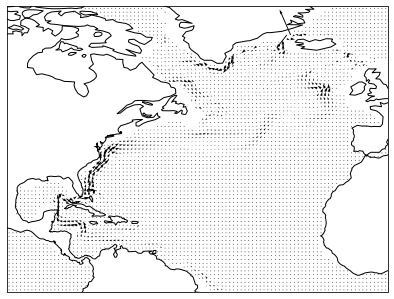

In [39]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(121,projection=ccrs.PlateCarree())
Q = ax.quiver(du_rgd_LR.lon, du_rgd_LR.lat, uvel1_rgd_LR/10, vvel1_rgd_LR/10, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_xlim([-100,0])
ax.set_ylim([0,75]) 

(0.0, 75.0)

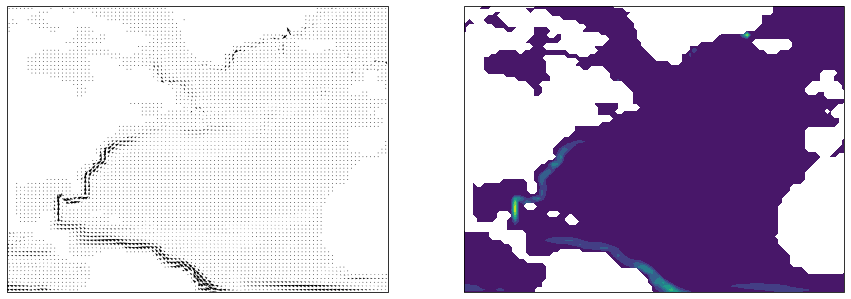

In [76]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(121,projection=ccrs.PlateCarree())
Q = ax.quiver(uvel_rgd_LR.lon,uvel_rgd_LR.lat,uvel_rgd_LR/1,vvel_rgd_LR/1, transform=ccrs.PlateCarree())
ax.set_xlim([-100,0])
ax.set_ylim([0,75])
ax = fig.add_subplot(122,projection=ccrs.PlateCarree())
Q = ax.contourf(uvel_rgd_LR.lon,uvel_rgd_LR.lat,(uvel_rgd_LR**2 + vvel_rgd_LR**2)/10000, vmin=0,vmax=0.5, transform=ccrs.PlateCarree())
ax.set_xlim([-100,0])
ax.set_ylim([0,75])

In [9]:
# ds0_LR = xr.open_dataset(infile0_LR, chunks=chunk_size_LR) # reference HR file 
# TLAT_LR = ds0_LR.TLAT # LR TLAT and TLONG for reference
# TLON_LR = ds0_LR.TLONG
# TAREA_LR = ds0_LR.TAREA # weights for spatial averages


# ds0_HR = xr.open_dataset(infile0_HR, chunks=chunk_size_HR) # reference HR file 
# ds0_NA_HR = ds0_HR.isel(nlon=slice(nlon1_NA_HR, nlon2_NA_HR), nlat=slice(nlat1_NA_HR, nlat2_NA_HR))

# TLAT_NA_HR = ds0_NA_HR.TLAT # HR TLAT and TLONG for reference
# TLON_NA_HR = ds0_NA_HR.TLONG
# TAREA_NA_HR = ds0_NA_HR.TAREA # weights for spatial averages

# ds0_NA_HR 

In [10]:
# TAREA_NEA_LR = TAREA_LR.where(((TLAT_LR>lat1_NEA) & (TLAT_LR<lat2_NEA) & (TLON_LR>lon1_NEA) 
#                                    & (TLON_LR < lon2_NEA)),0)


# TAREA_NEA_HR = TAREA_NA_HR.where(((TLAT_NA_HR>lat1_NEA) & (TLAT_NA_HR<lat2_NEA) & (TLON_NA_HR>lon1_NEA) 
#                                    & (TLON_NA_HR < lon2_NEA)),0)
# TAREA_NEA_HR.plot.pcolormesh()

manipulate LR to get the North Atlantic region

<xarray.Dataset>
Dimensions:  (nlat: 134, nlon: 100, time: 26)
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2018-12-31
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(134, 50), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(134, 50), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(134, 50), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(134, 50), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    SSH      (time, nlat, nlon) float32 dask.array<chunksize=(26, 134, 50), meta=np.ndarray>

<xarray.DataArray 'SSH' (nlat: 1000, nlon: 1000)>
dask.array<mean_agg-aggregate, shape=(1000, 1000), dtype=float32, chunksize=(200, 200), chunktype=numpy.ndarray>
Coordinates:
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

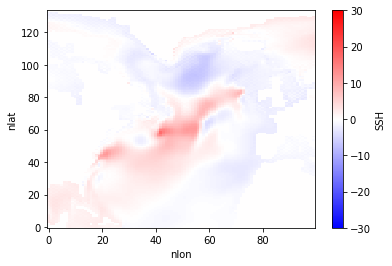

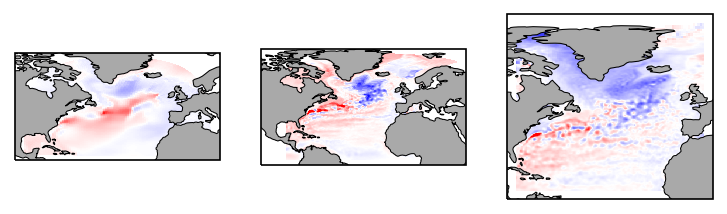

In [62]:
fig = plt.figure(dpi=150)

ax = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree(central_longitude=300.0))
pc = ax.pcolormesh(ds_ssh_NA_LR.TLONG, ds_ssh_NA_LR.TLAT, (ssh2_LR - ssh1_LR).where(abs(ssh2_LR)<100000),
                   transform=ccrs.PlateCarree(),vmin=-20,vmax=20,cmap='bwr')
land = ax.add_feature(
    cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                        linewidth=0.5,
                                        edgecolor='black',
                                        facecolor='darkgray'))

ax = plt.subplot(1, 3, 2, projection=ccrs.PlateCarree(central_longitude=300.0))
pc = ax.pcolormesh(TLON_HR, TLAT_HR, (ssh2_HR - ssh1_HR),
                   transform=ccrs.PlateCarree(),vmin=-20,vmax=20,cmap='bwr')

# ax.set_global() 

land = ax.add_feature(
    cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                        linewidth=0.5,
                                        edgecolor='black',
                                        facecolor='darkgray'))

ax = plt.subplot(1, 3, 3, projection=ccrs.PlateCarree(central_longitude=300.0))
pc = ax.pcolormesh(sla2_obs.longitude, sla2_obs.latitude, (sla2_obs - sla1_obs - 0.05)*100,
                   transform=ccrs.PlateCarree(),vmin=-20,vmax=20,cmap='bwr')

# ax.set_global() 

land = ax.add_feature(
    cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                        linewidth=0.5,
                                        edgecolor='black',
                                        facecolor='darkgray'))

# cb = plt.colorbar(pc, shrink=0.55);

Observation

In [13]:
ds_obs = xr.open_mfdataset(infiles_obs, compat="override", combine="by_coords",data_vars="minimal",
                          coords="minimal",parallel=True)
ds_obs

<xarray.Dataset>
Dimensions:           (latitude: 720, longitude: 1440, nv: 2, time: 312)
Coordinates:
  * time              (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2018-12-15
  * latitude          (latitude) float32 -89.875 -89.625 ... 89.625 89.875
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.625 359.875
  * nv                (nv) int32 0 1
Data variables:
    crs               int32 ...
    climatology_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds          (latitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds          (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
    sla               (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2020-02-12 20:20:20Z: Creation
    date_issued:                     2020-02-12 20:20:20Z: Creation
    date_modified:                   2020-02-12 20:20:20Z: Creation
    geospatial_lat_max:              89.875
    geospatial_lat_min:              -89.875
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.875
    geospatial_lon_min:              0.125
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2020-02-12 20:20:20Z: Creation
    institution:                     CNES, CLS
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    processing_level:                L4
    product_version:                 2020
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         Delayed Time Level-4 monthly mean of sea...
    time_coverage_duration:          P1M
    time_coverage_end:               1993-01-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             1993-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Oc...

In [18]:
ds_obs.sla.sel(time=time2_slice).mean(('time','longitude','latitude')).values

array(0.05919393)

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


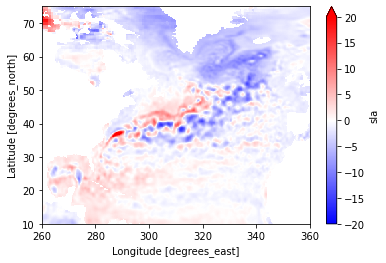

In [19]:
sla2_obs = ds_obs.sla.sel(time=time2_slice,longitude=slice(lon1_NA+360, lon2_NA+360), 
        latitude=slice(lat1_NA, lat2_NA)).mean('time') - ds_obs.sla.sel(time=time2_slice).mean(('longitude','latitude','time'))
sla1_obs = ds_obs.sla.sel(time=time1_slice,longitude=slice(lon1_NA+360, lon2_NA+360), 
        latitude=slice(lat1_NA, lat2_NA)).mean('time') - ds_obs.sla.sel(time=time1_slice).mean(('longitude','latitude','time'))
((sla2_obs - sla1_obs)*100).plot.pcolormesh(vmin=-20,vmax=20,cmap='bwr')

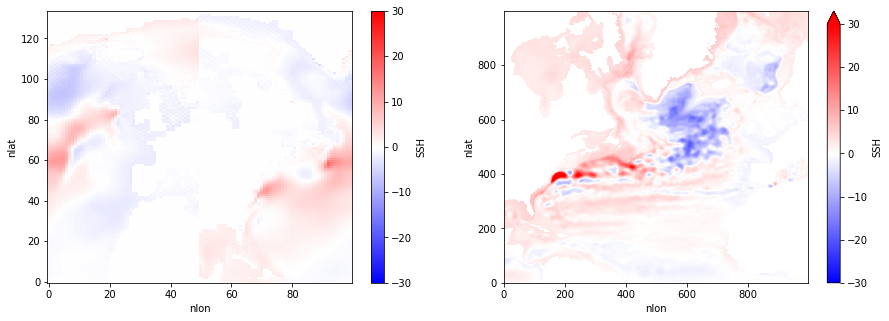

In [11]:
import cartopy.crs as ccrs
# map_proj = ccrs.LambertConformal()
# (uvel2_HR - uvel1_HR).plot(transform=ccrs.PlateCarree(),vmin=-30, vmax=30, cmap='bwr',subplot_kws={'projection': ccrs.PlateCarree()})

fig, axes = plt.subplots(1,2,figsize=(15, 5))
(ssh2_LR - ssh1_LR).plot(ax=axes[0], vmin=-30,vmax=30, cmap='bwr', subplot_kws={'projection': ccrs.PlateCarree(), ax=axes[0]})
(ssh2_HR - ssh1_HR).plot(ax=axes[1], vmin=-30,vmax=30, cmap='bwr')

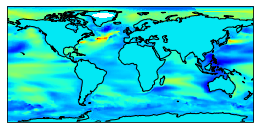

In [21]:
import cartopy
pc = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(15, 8))

# historic LR
ax1 = fig.add_subplot(231,projection=pc)
subplt1=ax1.pcolormesh(lon_LR, lat_LR, ssh_LR,
                       transform=pc,cmap='jet')
ax1.coastlines()
# ax1.set_extent([-85, -25, 20, 80], crs=pc)
# ax1.set_xticks(np.arange(-85,-24,20))
# ax1.set_yticks(np.arange(20,81,20))
# ax1.set_title('historic (2004-2017) - LR')
# plt.text(-50, 72, 'Greenland')
# plt.text(-76, 53, 'Canada')

In [9]:
ds_temp_HR = xr.open_dataset(infile_temp_NA_HR, chunks=chunk_size_HR)
# ds_temp_HR = ds_temp_HR.assign_coords(z_t=ds_temp_HR.z_t/100) # convert z_t from cm to m 
ds_salt_HR = xr.open_dataset(infile_salt_NA_HR, chunks=chunk_size_HR)
# ds_salt_HR = ds_salt_HR.assign_coords(z_t=ds_salt_HR.z_t/100) # convert z_t from cm to m 
ds_temp_HR


temp2_HR = ds_temp_HR.sel(z_t=slice(0,1000)).mean('z_t').sel(time=slice('2014','2018')).mean('time').TEMP
temp1_HR = ds_temp_HR.sel(z_t=slice(0,1000)).mean('z_t').sel(time=slice('1997','2001')).mean('time').TEMP
(temp2_HR - temp1_HR).plot()



<xarray.Dataset>
Dimensions:  (nlat: 1000, nlon: 1000, time: 26, z_t: 62)
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2018-12-31
  * z_t      (z_t) float32 5.0 15.0 25.0 35.0 ... 5375.0 5624.9907 5874.9907
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(26, 62, 200, 200), meta=np.ndarray>

In [ ]:
ds_ut_HR = xr.open_dataset(infile_ut_NA_HR, chunks=chunk_size_HR)
# ds_ut_HR = ds_ut_HR.assign_coords(z_t=ds_ut_HR.z_t/100) # convert z_t from cm to m 
ds_vt_HR = xr.open_dataset(infile_vt_NA_HR, chunks=chunk_size_HR)
# ds_vt_HR = ds_vt_HR.assign_coords(z_t=ds_vt_HR.z_t/100) # convert z_t from cm to m 
ds_vt_HR
ds_wt_HR = xr.open_dataset(infile_wt_NA_HR, chunks=chunk_size_HR)
ds_wt_HR = ds_wt_HR.assign_coords(z_w_top=ds_wt_HR.z_w_top/100) # convert z_t from cm to m 
ds_wt_HR

wt2_HR = ds_wt_HR.sel(time=slice('2014','2018')).mean('time').WTT.sel(z_w_top=500, method="nearest")
# wt1_HR = ds_wt_HR.sel(time=slice('1997','2001')).mean('time').WTT
# wt2_HR.plot(vmin=-5e-5,vmax=5e-5,cmap='bwr')
wt1_HR = ds_wt_HR.sel(time=slice('1997','2001')).mean('time').WTT.sel(z_w_top=500, method="nearest")
# wt1_HR = ds_wt_HR.sel(time=slice('1997','2001')).mean('time').WTT
# wt1_HR.plot(vmin=-5e-5,vmax=5e-5,cmap='bwr')
(wt2_HR-wt1_HR).plot(vmin=-5e-6,vmax=5e-6,cmap='bwr')

ut2_HR = ds_ut_HR.sel(z_t=slice(0,1000)).mean('z_t').sel(time=slice('2014','2018')).mean('time').UET
ut1_HR = ds_ut_HR.sel(z_t=slice(0,1000)).mean('z_t').sel(time=slice('1997','2001')).mean('time').UET
(ut2_HR - ut1_HR).plot(vmin=-5e-4,vmax=5e-4,cmap='bwr')

vt2_HR = ds_vt_HR.sel(z_t=slice(0,1000)).mean('z_t').sel(time=slice('2014','2018')).mean('time').VNT
vt1_HR = ds_vt_HR.sel(z_t=slice(0,1000)).mean('z_t').sel(time=slice('1997','2001')).mean('time').VNT
(vt2_HR - vt1_HR).plot(vmin=-5e-4,vmax=5e-4,cmap='bwr')

(ut2_HR + vt2_HR + wt2_HR - ut1_HR - vt1_HR - wt1_HR).plot(vmin=-5e-4,vmax=5e-4,cmap='bwr')

# WT

In [6]:
ds_ut_LR = xr.open_dataset(infile_ut_LR, chunks=chunk_size_LR)
ds_ut_LR = ds_ut_LR.assign_coords(z_t=ds_ut_LR.z_t/100) # convert z_t from cm to m 
ds_vt_LR = xr.open_dataset(infile_vt_LR, chunks=chunk_size_LR)
ds_vt_LR = ds_vt_LR.assign_coords(z_t=ds_vt_LR.z_t/100) # convert z_t from cm to m 
# ds_temp_NEA_LR = ds_temp_LR.where((TLAT_LR>lat1_NEA) & (TLAT_LR<lat2_NEA) & (TLON_LR>lon1_NEA) & (TLON_LR<lon2_NEA))
ds_vt_LR

ds_uvel_LR = xr.open_dataset(infile_uvel_LR, chunks=chunk_size_LR)
ds_vvel_LR = xr.open_dataset(infile_vvel_LR, chunks=chunk_size_LR)
# ds_uvel_LR = ds_uvel_LR.assign_coords(z_t=ds_uvel_LR.z_t/100) # convert z_t from cm to m 

# ds_salt_LR = xr.open_dataset(infile_salt_LR, chunks=chunk_size_LR)
# ds_salt_LR = ds_salt_LR.assign_coords(z_t=ds_salt_LR.z_t/100) # convert z_t from cm to m 
# # ds_salt_NEA_LR = ds_salt_LR.where((TLAT_LR>lat1_NEA) & (TLAT_LR<lat2_NEA) & (TLON_LR>lon1_NEA) & (TLON_LR<lon2_NEA))
# ds_salt_NEA_LR
ds_ut_LR

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 26, z_t: 60)
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2018-12-31
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    UET      (time, z_t, nlat, nlon) float32 dask.array<chunksize=(26, 60, 384, 320), meta=np.ndarray>

In [40]:
ds_uvel_LR = xr.open_dataset(infile_uvel_LR)
ds_vvel_LR = xr.open_dataset(infile_vvel_LR)
ds_vvel_LR

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 26, z_t: 60)
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2018-12-31
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    VVEL     (time, z_t, nlat, nlon) float32 ...

In [38]:
ds_uvel_HR = xr.open_dataset(infile_uvel_NA_HR, chunks=chunk_size_HR)
ds_vvel_HR = xr.open_dataset(infile_vvel_NA_HR, chunks=chunk_size_HR)
# ds_uvel_HR = ds_uvel_HR.assign_coords(z_t=ds_uvel_HR.z_t/100) # convert z_t from cm to m 
ds_uvel_HR

ds_uv_HR = xr.merge([ds_uvel_HR, ds_vvel_HR])
ds_uv_HR

<xarray.Dataset>
Dimensions:  (nlat: 1000, nlon: 1000, time: 26, z_t: 62)
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2018-12-31
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 537500.0 562499.06 587499.06
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(200, 200), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    UVEL     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(26, 62, 200, 200), meta=np.ndarray>
    VVEL     (time, z_t, nlat, nlon) float32 dask.array<chunksize=(26, 62, 200, 200), meta=np.ndarray>

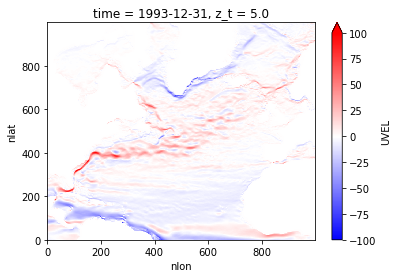

In [26]:
ds_uvel_HR.UVEL.isel(time=0,z_t=0).plot(vmin=-100,vmax=100,cmap='bwr')

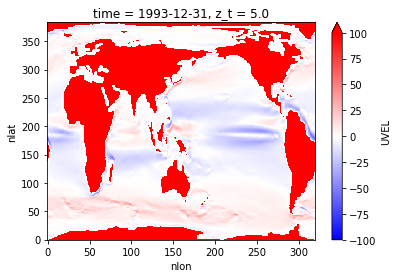

In [30]:
ds_uvel_LR.UVEL.isel(time=0,z_t=0).plot(vmin=-100,vmax=100,cmap='bwr')

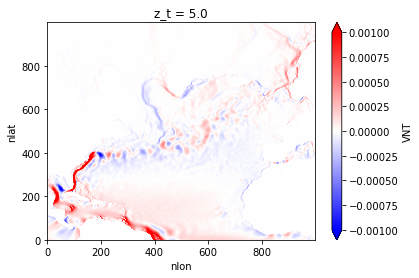

In [48]:
ds_vt_HR.VNT.sel(time=slice('1993','2000'),z_t=5).mean('time').plot(vmin=-0.001,vmax=0.001,cmap='bwr')

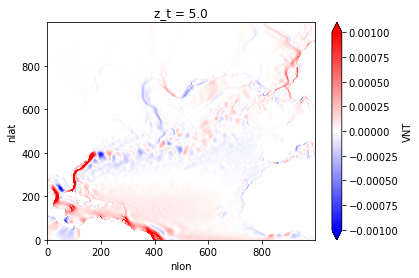

In [49]:
ds_vt_HR.VNT.sel(time=slice('2008','2015'),z_t=5).mean('time').plot(vmin=-0.001,vmax=0.001,cmap='bwr')

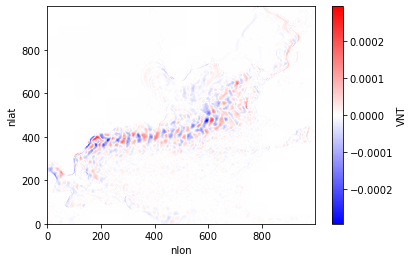

In [54]:
(ds_vt_HR.VNT.sel(time=slice('2008','2015'),z_t=slice(0,1000)).mean(('time','z_t')) - 
 ds_vt_HR.VNT.sel(time=slice('1993','2000'),z_t=slice(0,1000)).mean(('time','z_t'))).plot(cmap='bwr')

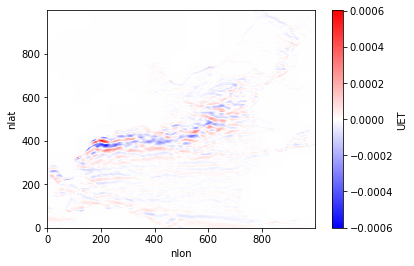

In [47]:
(ds_ut_HR.UET.isel(z_t=slice(0,20)).sel(time=slice('2008','2015')).mean(('time','z_t')) - 
 ds_ut_HR.UET.isel(z_t=slice(0,20)).sel(time=slice('1993','2000')).mean(('time','z_t'))).plot(cmap='bwr')

In [9]:
temp_NEA_LR = ds_temp_NEA_LR.TEMP
temp_NEA_LR = temp_NEA_LR.where(abs(temp_NEA_LR)<100.0, np.nan) # mask land with nan

temp_anom_NEA_LR = temp_NEA_LR - temp_NEA_LR.mean('time')
temp_anom_NEA_sav_LR = temp_anom_NEA_LR.weighted(TAREA_NEA_LR).mean(("nlon", "nlat")) # sav: spatial average

salt_NEA_LR = ds_salt_NEA_LR.SALT
salt_NEA_LR = salt_NEA_LR.where(abs(salt_NEA_LR)<100.0, np.nan) # mask land with nan

salt_anom_NEA_LR = salt_NEA_LR - salt_NEA_LR.mean('time')
salt_anom_NEA_sav_LR = salt_anom_NEA_LR.weighted(TAREA_NEA_LR).mean(("nlon", "nlat")) # sav: spatial average


temp_anom_NEA_HR = ds_temp_NEA_HR.TEMP - ds_temp_NEA_HR.TEMP.mean('time')
temp_anom_NEA_sav_HR = temp_anom_NEA_HR.weighted(TAREA_NEA_HR).mean(("nlon", "nlat")) # sav: spatial average

salt_anom_NEA_HR = ds_salt_NEA_HR.SALT - ds_salt_NEA_HR.SALT.mean('time')
salt_anom_NEA_sav_HR = salt_anom_NEA_HR.weighted(TAREA_NEA_HR).mean(("nlon", "nlat")) # sav: spatial average
salt_anom_NEA_sav_HR

<xarray.DataArray (time: 26, z_t: 62)>
dask.array<truediv, shape=(26, 62), dtype=float64, chunksize=(26, 62), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1993-12-31 1994-12-31 ... 2018-12-31
  * z_t      (z_t) float32 5.0 15.0 25.0 35.0 ... 5375.0 5624.9907 5874.9907

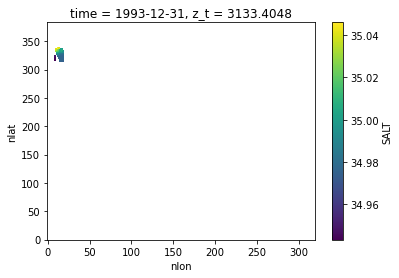

In [10]:
salt_NEA_LR.isel(time=0,z_t=50).plot()

# make pics
entire water column contours

In [11]:
# LR and HR have same z_t values in the upper 60 layers
print('--- HR z_t ---')
print(temp_anom_NEA_sav_HR.z_t)
print('--- LR z_t---')
print(temp_anom_NEA_sav_LR.z_t)
print('--- HR-LR z_t ---')
print(temp_anom_NEA_sav_HR.z_t - temp_anom_NEA_sav_LR.z_t)

--- HR z_t ---
<xarray.DataArray 'z_t' (z_t: 62)>
array([5.000000e+00, 1.500000e+01, 2.500000e+01, 3.500000e+01, 4.500000e+01,
       5.500000e+01, 6.500000e+01, 7.500000e+01, 8.500000e+01, 9.500000e+01,
       1.050000e+02, 1.150000e+02, 1.250000e+02, 1.350000e+02, 1.450000e+02,
       1.550000e+02, 1.650984e+02, 1.754790e+02, 1.862913e+02, 1.976603e+02,
       2.097114e+02, 2.225783e+02, 2.364088e+02, 2.513702e+02, 2.676542e+02,
       2.854836e+02, 3.051192e+02, 3.268680e+02, 3.510935e+02, 3.782276e+02,
       4.087846e+02, 4.433777e+02, 4.827367e+02, 5.277280e+02, 5.793729e+02,
       6.388626e+02, 7.075633e+02, 7.870025e+02, 8.788253e+02, 9.847059e+02,
       1.106204e+03, 1.244567e+03, 1.400497e+03, 1.573946e+03, 1.764003e+03,
       1.968944e+03, 2.186457e+03, 2.413972e+03, 2.649001e+03, 2.889385e+03,
       3.133405e+03, 3.379793e+03, 3.627670e+03, 3.876452e+03, 4.125768e+03,
       4.375393e+03, 4.625190e+03, 4.875083e+03, 5.125028e+03, 5.375000e+03,
       5.624991e+03, 5.874

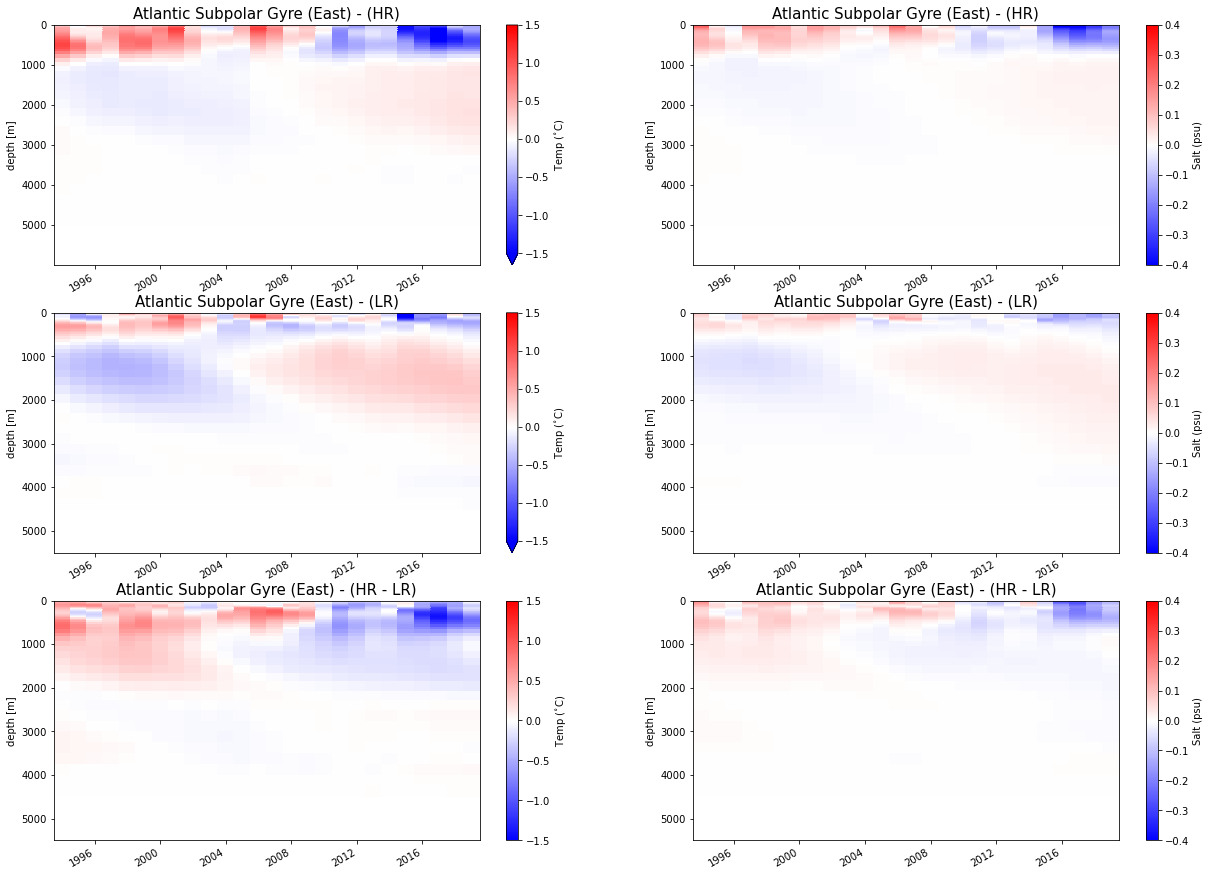

In [12]:
fig = plt.figure(figsize=(21, 15))

ax1 = fig.add_subplot(321)
temp_anom_NEA_sav_HR.plot.pcolormesh(ax=ax1, x='time', yincrease=False, vmin=-1.5, vmax=1.5, cmap='bwr',
                                        add_labels=False, cbar_kwargs=dict(label='Temp ($^{\circ}$C)')) 
ax1.set_ylabel('depth [m]')
ax1.set_title('Atlantic Subpolar Gyre (East) - (HR)', fontsize=15)

ax3 = fig.add_subplot(323)
temp_anom_NEA_sav_LR.plot.pcolormesh(ax=ax3, x='time', yincrease=False, vmin=-1.5, vmax=1.5, cmap='bwr',
                                     add_labels=False, cbar_kwargs=dict(label='Temp ($^{\circ}$C)')) 
ax3.set_ylabel('depth [m]')
ax3.set_title('Atlantic Subpolar Gyre (East) - (LR)', fontsize=15)

ax5 = fig.add_subplot(325)
(temp_anom_NEA_sav_HR - temp_anom_NEA_sav_LR).plot.pcolormesh(ax=ax5, x='time', yincrease=False, vmin=-1.5, vmax=1.5, 
                                         add_labels=False, cmap='bwr', cbar_kwargs=dict(label='Temp ($^{\circ}$C)')) 
ax5.set_ylabel('depth [m]')
ax5.set_title('Atlantic Subpolar Gyre (East) - (HR - LR)', fontsize=15)

ax2 = fig.add_subplot(322)
salt_anom_NEA_sav_HR.plot.pcolormesh(ax=ax2, x='time', yincrease=False, vmin=-0.4, vmax=0.4, cmap='bwr',
                                     add_labels=False, cbar_kwargs=dict(label='Salt (psu)')) 
ax2.set_ylabel('depth [m]')
ax2.set_title('Atlantic Subpolar Gyre (East) - (HR)', fontsize=15)

ax4 = fig.add_subplot(324)
salt_anom_NEA_sav_LR.plot.pcolormesh(ax=ax4, x='time', yincrease=False, vmin=-0.4, vmax=0.4, cmap='bwr',
                                     add_labels=False, cbar_kwargs=dict(label='Salt (psu)')) 
ax4.set_ylabel('depth [m]')
ax4.set_title('Atlantic Subpolar Gyre (East) - (LR)', fontsize=15)

ax6 = fig.add_subplot(326)
(salt_anom_NEA_sav_HR - salt_anom_NEA_sav_LR).plot.pcolormesh(ax=ax6, x='time', yincrease=False, vmin=-0.4, vmax=0.4, 
                                                    add_labels=False, cmap='bwr',cbar_kwargs=dict(label='Salt (psu)')) 
ax6.set_ylabel('depth [m]')
ax6.set_title('Atlantic Subpolar Gyre (East) - (HR - LR)', fontsize=15)

plt.savefig(pic1,bbox_inches='tight')

upper 100 m contours

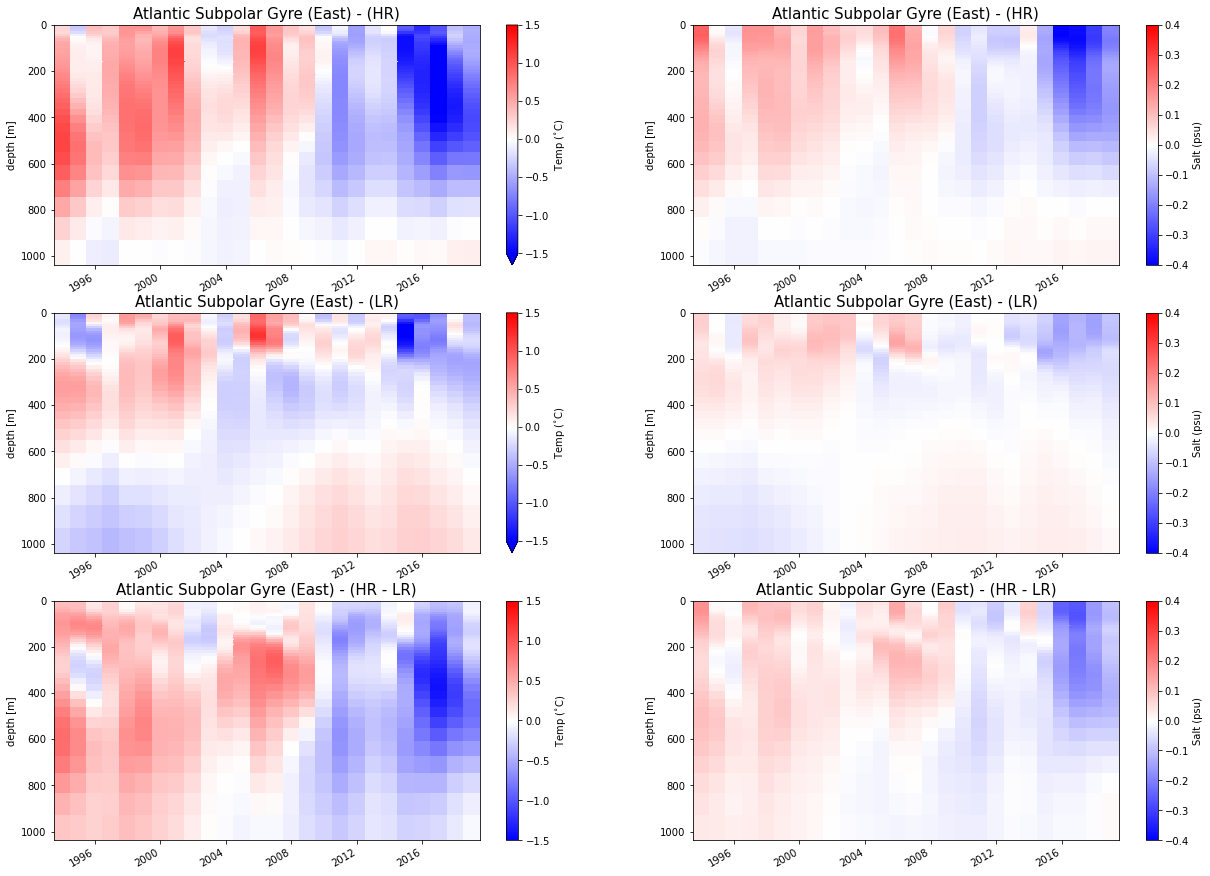

In [13]:
fig = plt.figure(figsize=(21, 15))

ax1 = fig.add_subplot(321)
temp_anom_NEA_sav_HR.sel(z_t=slice(0,1000)).plot.pcolormesh(ax=ax1, x='time', yincrease=False, vmin=-1.5, vmax=1.5, 
                                        add_labels=False, cmap='bwr', cbar_kwargs=dict(label='Temp ($^{\circ}$C)')) 
ax1.set_ylabel('depth [m]')
ax1.set_title('Atlantic Subpolar Gyre (East) - (HR)', fontsize=15)

ax3 = fig.add_subplot(323)
temp_anom_NEA_sav_LR.sel(z_t=slice(0,1000)).plot.pcolormesh(ax=ax3, x='time', yincrease=False, vmin=-1.5, vmax=1.5, 
                                        add_labels=False, cmap='bwr', cbar_kwargs=dict(label='Temp ($^{\circ}$C)')) 
ax3.set_ylabel('depth [m]')
ax3.set_title('Atlantic Subpolar Gyre (East) - (LR)', fontsize=15)

ax5 = fig.add_subplot(325)
(temp_anom_NEA_sav_HR - temp_anom_NEA_sav_LR).sel(z_t=slice(0,1000)).plot.pcolormesh(ax=ax5, x='time', yincrease=False, 
                                        add_labels=False, vmin=-1.5, vmax=1.5, cmap='bwr', cbar_kwargs=dict(label='Temp ($^{\circ}$C)')) 
ax5.set_ylabel('depth [m]')
ax5.set_title('Atlantic Subpolar Gyre (East) - (HR - LR)', fontsize=15)

ax2 = fig.add_subplot(322)
salt_anom_NEA_sav_HR.sel(z_t=slice(0,1000)).plot.pcolormesh(ax=ax2, x='time', yincrease=False, vmin=-0.4, vmax=0.4, 
                                                add_labels=False, cmap='bwr', cbar_kwargs=dict(label='Salt (psu)')) 
ax2.set_ylabel('depth [m]')
ax2.set_title('Atlantic Subpolar Gyre (East) - (HR)', fontsize=15)

ax4 = fig.add_subplot(324)
salt_anom_NEA_sav_LR.sel(z_t=slice(0,1000)).plot.pcolormesh(ax=ax4, x='time', yincrease=False, vmin=-0.4, vmax=0.4, 
                                                add_labels=False, cmap='bwr', cbar_kwargs=dict(label='Salt (psu)')) 
ax4.set_ylabel('depth [m]')
ax4.set_title('Atlantic Subpolar Gyre (East) - (LR)', fontsize=15)

ax6 = fig.add_subplot(326)
(salt_anom_NEA_sav_HR - salt_anom_NEA_sav_LR).sel(z_t=slice(0,1000)).plot.pcolormesh(ax=ax6, x='time', yincrease=False, 
                                    add_labels=False, vmin=-0.4, vmax=0.4, cmap='bwr',cbar_kwargs=dict(label='Salt (psu)')) 
ax6.set_ylabel('depth [m]')
ax6.set_title('Atlantic Subpolar Gyre (East) - (HR - LR)', fontsize=15)

plt.savefig(pic2,bbox_inches='tight')